# Part 1

Prediction accuracy is 89.5 for K = 1 
Prediction accuracy is 89.5 for K = 2 
Prediction accuracy is 91.3 for K = 3 
Prediction accuracy is 91.9 for K = 4 
Prediction accuracy is 92.4 for K = 5 
Prediction accuracy is 92.5 for K = 6 
Prediction accuracy is 92.30000000000001 for K = 7 
Prediction accuracy is 92.7 for K = 8 
Prediction accuracy is 92.9 for K = 9 
Prediction accuracy is 93.10000000000001 for K = 10 


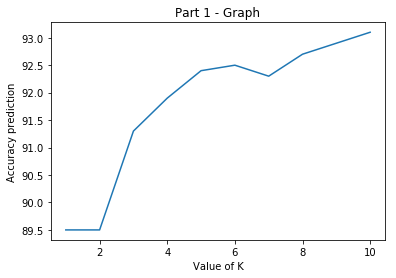

In [14]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

class MLPart1:
    def __init__(self, __trainingDataFile, __testDataFile, __k):
        self.trainingDataFileName = __trainingDataFile
        self.testDataFileName = __testDataFile
        self.trainingData = np.array([])
        self.testData = np.array([])
        self.euclideanDistances = np.array([])
        self.euclideanDistancesSorted = np.array([])
        self.predictions = np.array([])
        self.originalCategories = np.array([])
        self.readInstances()
        self.k = __k

    def readInstances(self):
        """
        Reading an instance from fName
        """
        self.trainingData = np.genfromtxt(self.trainingDataFileName, delimiter=',', dtype=float)
        self.testData = np.genfromtxt(self.testDataFileName, delimiter=',', dtype=float)
        self.originalCategories = self.testData[:, -1]

    # Works on local variables and returns 2 numpy array
    def calculateDistances(self,trainingInstancesMatrix, singlQueryPoint):
        data = np.sqrt(np.sum((trainingInstancesMatrix - singlQueryPoint) ** 2, axis=1))
        return data, np.argsort(data)

    # Works on global variables
    def updateDistances(self):
         distances = []
         sortedDistances = []
         for i in range(0, np.shape(self.testData)[0]):
            d, sd = self.calculateDistances(self.trainingData[:, :-1], self.testData[i, :-1])
            distances.append(d)
            sortedDistances.append(sd)
            i+= 1
         self.euclideanDistances = np.array(distances)
         self.euclideanDistancesSorted = np.array(sortedDistances)

    def predictCategories(self):
        prediction = np.array([])
        # To order tp improve performance, avoid calculation with K=1
        if self.k == 1:
            for i in range(0, len(self.euclideanDistances)):
                index = self.euclideanDistancesSorted[i][0]
                prediction = np.append(prediction, self.trainingData[index][-1])
        else:
            for i in range(0, len(self.euclideanDistances)):
                indices = self.euclideanDistancesSorted[i, :self.k]
                indice_category_distance = {}
                tie = []
                for indice in indices:
                    tie.append(self.trainingData[indice][-1])
                data = Counter(tie)
                #print(data.most_common(1)[0][0])  # Returns the highest occurring item
                prediction = np.append(prediction, data.most_common(1)[0][0])
        self.predictions = prediction


    def predictionAccuracy(self):
        instancesCount = len(self.originalCategories)
        correctPredictionCounter = 0
        for i in range(0,instancesCount):
            if self.originalCategories[i] == self.predictions[i]:
                correctPredictionCounter +=1
        return (correctPredictionCounter/instancesCount) * 100

    def viewData(self):
        print(self.euclideanDistances)

    def search(self):
        self.updateDistances()
        self.predictCategories()
        return self.predictionAccuracy()

        
prediction_over_k = np.array([])   
K = np.array([])
for i in range(1,11):
    ml = MLPart1("data\\classification\\trainingData.csv", "data\\classification\\testData.csv", i)
    tmp = ml.search()
    print("Prediction accuracy is {} for K = {} ".format(tmp,i))
    K = np.append(K,i)
    prediction_over_k = np.append(prediction_over_k, tmp)

plt.xlabel("Value of K")
plt.ylabel("Accuracy prediction")
plt.title("Part 1 - Graph")
plt.plot(K,prediction_over_k)
plt.show()
